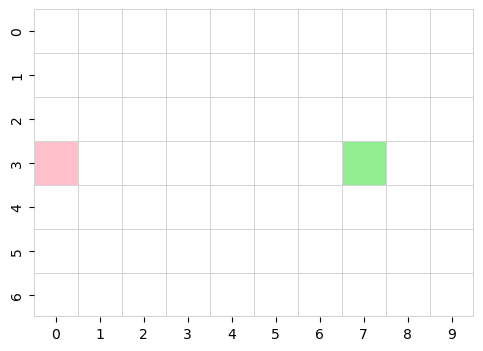

In [1]:
import numpy as np
from windy_gridworld import WindyGridWorld, sample_policy_episode


np.random.seed(42)

grid_world = WindyGridWorld()
grid_world.render()


Ep #9999: 53 time steps: 100%|██████████| 10000/10000 [00:49<00:00, 204.07it/s]


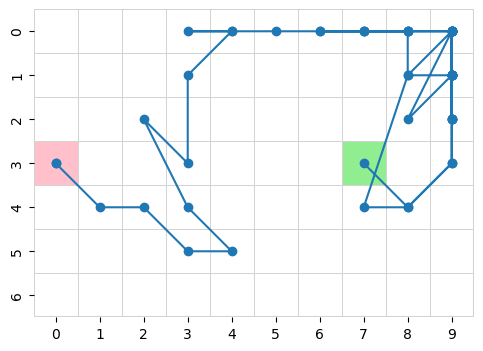

In [4]:
import logging
from tqdm import trange


def sarsa_on_policy(
    env: WindyGridWorld,
    max_eps: int = 100,
    max_time: int = 20000,
    alpha=0.5,
    epsilon=0.1,
):
    logging.info("Start training...")
    # Inititalize
    action_dim = len(env.action_space)
    state_action_dims = (*env.grid_map.shape, action_dim)
    Q = np.zeros(state_action_dims)
    policy = np.ones(Q.shape) / action_dim

    def choose_action(state: np.ndarray):
        return np.random.choice(action_dim, p=policy[tuple(state)])

    state_history = [env.current_state]
    progress_bar = trange(max_eps)
    for ep_num in progress_bar:
        env.reset()
        state = env.current_state
        action = choose_action(state)
        state_history = [env.current_state]
        for t in range(max_time):
            state_action = (*state, action)
            reward, finished = env.step(env.action_space[action])
            next_state = env.current_state
            next_action = choose_action(next_state)
            next_state_action = (*next_state, next_action)
            Q[state_action] += alpha * (
                reward + Q[next_state_action] - Q[state_action]
            )

            policy[tuple(state)] = epsilon / action_dim
            policy[(*state, np.argmax(Q[tuple(state)]))] = 1 - epsilon + epsilon / action_dim
            state = next_state
            action = next_action
            state_history.append(state)
            if finished:
                progress_bar.set_description(f"Ep #{ep_num}: {t} time steps")
                break
        else:
            progress_bar.set_description(f"Ep #{ep_num}: {max_time} time steps")
    env.render(state_history)
    policy = np.argmax(Q, axis=-1)
    return Q, policy


Q, policy = sarsa_on_policy(grid_world, max_eps=10000, max_time=500, epsilon=0.5)

[[ 1  0]
 [-1  0]
 [ 0  1]
 [-1 -1]
 [ 1  1]
 [-1  1]
 [ 0  0]
 [ 0 -1]
 [ 1 -1]]
[[5 5 5 5 5 4 2 5 2 2]
 [5 4 2 4 4 5 2 2 4 4]
 [8 2 4 4 2 2 4 4 4 0]
 [4 4 4 5 2 4 4 0 8 8]
 [2 2 4 6 5 4 4 0 7 6]
 [4 4 4 4 4 4 2 6 3 1]
 [2 4 5 4 6 4 5 1 8 3]]


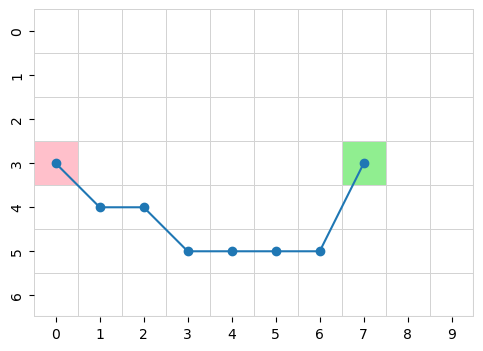

In [5]:
sample_policy_episode(grid_world, policy, 10)
print(grid_world.action_space)
print(policy)